# O'Sullivan / Koven method

In [1]:
from IPython.display import Markdown, display
display(Markdown("TracebilityText.md"))

---
jupyter:
  jupytext:
    text_representation:
      extension: .md
      format_name: markdown
      format_version: '1.3'
      jupytext_version: 1.13.6
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3
---

<!-- #region -->
### Traceability analysis  

#### Outline
The traceability analysis defines several diagnostic variables using as much algebraic structure of the mass balance equation as is available.
Not all diagnostic variables are possible for all compartmental models. 

We chose here to introduce the diagnostic variables not all at once but rather in the order of decreasing generality.

The first diagnostic variables are available for all compartmental models and need no additional assumptions. 
In the later parts of this section we then assume to be able to identify more and more specific terms in the mass balance equation and use those to derive and trace ever more specific diagnostics.
Thus the very first part is valid for all models but how many of the later parts are applicable to a specific model  depends on how much we know about it.  


#### Derivation of the matrix decomposition 
Compartmental models (well mixed mass balanced) can be written in as an ordinary differential equation in matrix form that relates the momentary value of the (time) derivative $\frac{d X}{d t}$ of an yet unknown function $X$ to the momentary value of $X$ itself.   
$$
\frac{d X}{d t}= I(X,t) + \tilde{M}(X,t) X \quad (1)   
$$ 
where $X$ is the statevector representing the pool contents, $\tilde{M}$ the "Compartmental matrix" and $I$ the input vector.
In Yiqi's group equation (1) is usually written with the negative Compartmental Matrix $M=-\tilde{M}$ 

$$
\frac{d X}{d t}= I(X,t) - M(X,t) X \quad (2)   
$$ 

Together with a startvalue $X_0$ it constitutes an "initial value problem" (ivp) which can be solved numerically by moving step by step forward in time.

Note: 

It is mathematical standard notation to use $X$ in the *formulation* of the ivp (representing the momentary value) althoug *after we have solved it* the solution is expressed as function of time $X(t)$. This avoids confusion since everything appering with arguments is recognizable as explicitly calculable *before* we have solved the ivp.

The system is "nonautonomous" (if they depend on time $t$) and "nonlinear" if the dependent on $X$.
It is always possible to factorize $M(X,t)$ into a product $M=A(X,t) K(X,t)$ where $K$ is a  diagonal matrix.
and $I=B(t)*u(t)$ where $u$ is a scalar.
Using these we arrive at 
$$
\frac{d X}{d t}=B(X,t) u(X,t) - A(X,t) K(X,t) X   
$$

##### Linearity assumption
If we assume the model to be linear and nonautonomous the dependency on $X$ vanishes and we have

$$
\frac{d X}{d t}= A(t) K(t) X + B(t) u(t) . 
$$

##### Factorizability  assumption
Although this is not possible in general in many published models the nonautonous part  can be further localized into a diagonal matrix $\xi(t)$ so that we can achieve constant $A$ and $K$ which allows more specific interpretation.

$$
\frac{d X}{d t}= B(t)u(t) - A \xi(t) K X 
$$

##### Factorizability of $\xi$ assumption 
In some cases we can resolve $\xi$ further.
$$
\frac{d X}{d t}= B(t)u(t) - A \xi_{temp}(t) \xi_{mois}(t) K X  
$$

#### Definition of diagnostic variables

##### Storage capacity $X_c$ and storage potential $X_p$
These variables can be defined for any compartmental system and do not require either linearity nor factorizability. 
We can rearrange eq. $(1)$ and give names to the two summands. 
$$
X = M^{-1}(X,t) \left(I(X,t)- \frac{d X}{d t} \right) \\ 
  = \underbrace{M^{-1}(X,t)I(X,t)}_{X_c} - \underbrace{M^{-1}(X,t) \frac{d X}{d t} }_{X_p} \\
  = X_c - X_p
$$
Note:
This is not to be read as a recipe to compute $X$.
The equation becomes a bit clearer if we adapt the nomenclature to express that we *have solved the ivp* and know its solution $X(t)$  
and therefore also  the derivative $\frac{d X}{d t}=I(X(t),t) - M(X(t),t) X(t) =\dot{X}(t)$ 
By substituting the solution $X(t)$ we get the recipes to compute:
$$
\dot{X}(t) = I(X(t),t) - M(X(t),t) X \\
X_c(t) = X(t)-X_p(t) \\ 
X_p(t) = M^{-1}(X(t),t)I(X,t) \\ 
$$
we see that all the ingredients become explicit functions of time.   
Since all values are taken at the same time $t$ we can drop the time dependence
in the notation and write an equation we can use in the iterator.
$$
\dot{X} = I - M X \\
X_c = X + X_p \\ 
X_p = M^{-1}I  \\ 
$$

##### Residence time
The influx $I$ can always be written as $I=b u$ where the scalar $u=\sum_{k=1\dots n} I_k$  and the dimensionless vector $b=I/u$ where $\sum_{k=1\dots n} b_k =1$.
Assumimg that the pool contents (the components of $X$)  have dimension $mass$ we can infer from eq. (1) that $M$ has dimension $\frac{1}{time}$.
The components of the (inverse) matrix $M^{-1}$ have therefore dimension $time$. Accordingly the product $RT= M^{-1} b$ is a vector of the same shape as $X$  whose components have dimesion $time$.
In the context of the Traceability Framework $RT$ is therefore called *residence time*.

Notes on nomenclature: 
1. The term *residence time* is not universally used with the same connotation outside the context of the *Traceability Analysis*.

1. It is not *the time of residence* of the particles in the system for the following reasons:
    1. In well mixed systems particles can reside in a pool for different times from zero to infinity.
    1. You could compute the mean of these times over all particles exiting a pool, but even then the result is in general not equal to the above mentioned $rt$.
    1. The mean residence time would only coincide with the definition above if the system was in equilibrium (which it clearly is not as e.g $NPP(t)$ shows.)
    1. The origin of the term is probably most easily understood as the generalization of a one dimensional rate equation $\frac{d}{dt} x = m x + u$ 
       If $r$ and $u$ are constant then the mean residence time is $rt= m^{-1}$. If we start with the rate as property of the model the *residence time* 
       can be defined as the inverse of this rate. The above definition is the generalization of this simple relationship to matrices and vectors.
       The matrix $M^{-1}$ takes the role of the number $\frac{1}{m}$ . In the context of the *Traceability Analysis* $M^{-1}$ is called *Chasing Time*. 

<!-- #endregion -->

```python

```


### Loading required packages  and functions

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from functools import lru_cache
import general_helpers as gh
from bgc_md2.resolve.mvars import (
    CompartmentalMatrix,
    InputTuple,
    StateVariableTuple
)

### Selecting models to compare

In [3]:
# define models to compare as a dictionary (folder name : model name)
model_names={
    "yz_jules": "JULES",
    "kv_visit2": "VISIT",
    "jon_yib": "YIBs",
    "kv_ft_dlem": "DLEM",
    #"Aneesh_SDGVM":"SDGVM",
    #"cj_isam": "ISAM",
    "bian_ibis2":"IBIS",
    #"ORCHIDEE-V2":"OCN",
}

### Loading TRENDY data and model parameters

In [4]:
# define same step size for each model (in days)
delta_t_val=30

In [5]:
# load data and parameters
model_folders=[(k) for k in model_names]
test_arg_list=gh.get_test_arg_list(model_folders)

# fixme mm 8-12: 
# it would make sense to create a dictionary indexed by the model name 
# so it can be used for model comparisons by name like this one
test_args_dictionary={mf: gh.test_args(mf) for mf in model_folders}

Loading data and parameters for yz_jules model...
0.809417438271605
0.8095883969907407
reading  tsl , size is  (3840, 4, 144, 192)
{CompartmentalMatrix,InputTuple}
{InternalFluxesBySymbol,OutFluxesBySymbol,SmoothReservoirModel,InFluxesBySymbol,CompartmentalMatrix,InputTuple}
{InternalFluxesBySymbol,OutFluxesBySymbol,SmoothReservoirModel,InFluxesBySymbol,CompartmentalMatrix,InputTuple}
Loading data and parameters for kv_visit2 model...
{AggregatedVegetation2SoilCarbonFlux,VegetationCarbonInFluxesBySymbol,VegetationCarbonOutFluxesBySymbol,LuoXiDiagonalMatrix,VegetationCarbonCompartmentalMatrix,CarbonOutFluxesBySymbol,CarbonInternalFluxesBySymbol,CarbonInFluxesBySymbol,VegetationCarbonInternalFluxesBySymbol,CompartmentalMatrix,InputTuple}
{AggregatedVegetation2SoilCarbonFlux,CarbonInputTuple,VegetationCarbonInputTuple,VegetationCarbonInFluxesBySymbol,VegetationCarbonOutFluxesBySymbol,LuoXiDiagonalMatrix,InternalFluxesBySymbol,CarbonCompartmentalMatrix,VegetationCarbonCompartmentalMatrix,O

### Plots of traceable components

In [16]:
plt.rcParams.update({'font.size': 14})

In [7]:
model_cols={
    "JULES": "blue",
    "VISIT": "orange",
    "YIBs": "green",
    "DLEM": "red",
    "SDGVM":"yellow",
    "ISAM": "purple",
    "IBIS":"magenta",
    "OCN":"teal",
}

In [8]:
all_comp_dict= gh.get_traceable_components(model_names=model_names,
             test_arg_list=test_arg_list,
             delta_t_val=delta_t_val, 
             model_cols=model_cols,
             part=1,
             averaging=12*30//delta_t_val, # yearly averaging
             #averaging=30//delta_t_val, # monthly averaging
             overlap=True
             )

Computing traceable components for yz_jules...
Computing traceable components for kv_visit2...
Computing traceable components for jon_yib...
Computing traceable components for kv_ft_dlem...
Computing traceable components for bian_ibis2...


In [10]:
all_comp_dict_out=gh.get_components_from_output(model_names=model_names,
             test_arg_list=test_arg_list,
             delta_t_val=delta_t_val, 
             model_cols=model_cols,
             part=1,
             averaging=12*30//delta_t_val, # yearly averaging
             #averaging=30//delta_t_val, # monthly averaging
             overlap=True
             )

Getting traceable components for yz_jules...
Getting traceable components for kv_visit2...
Getting traceable components for jon_yib...
Getting traceable components for kv_ft_dlem...
Getting traceable components for bian_ibis2...


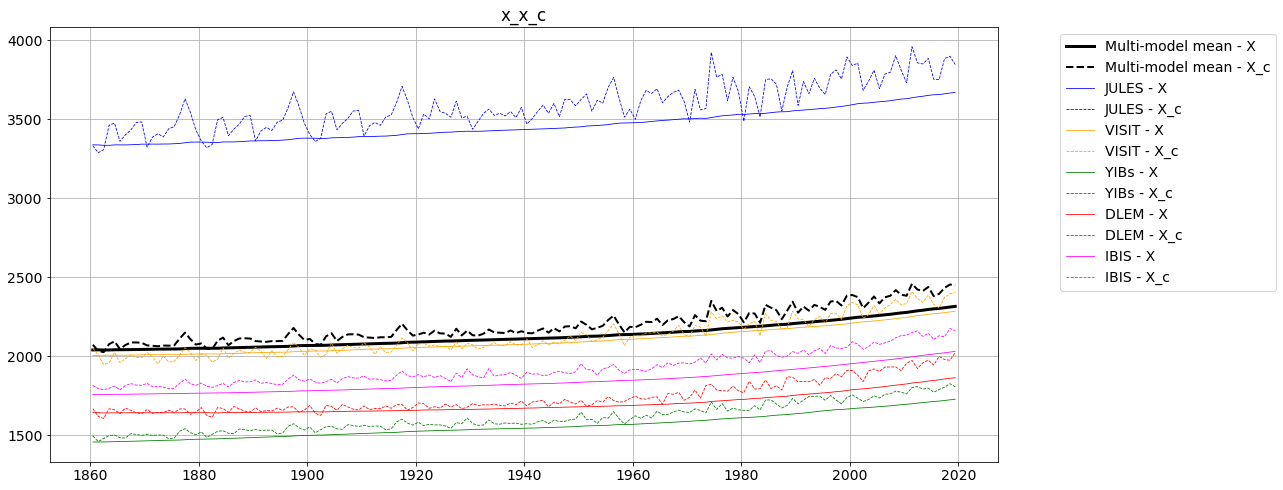

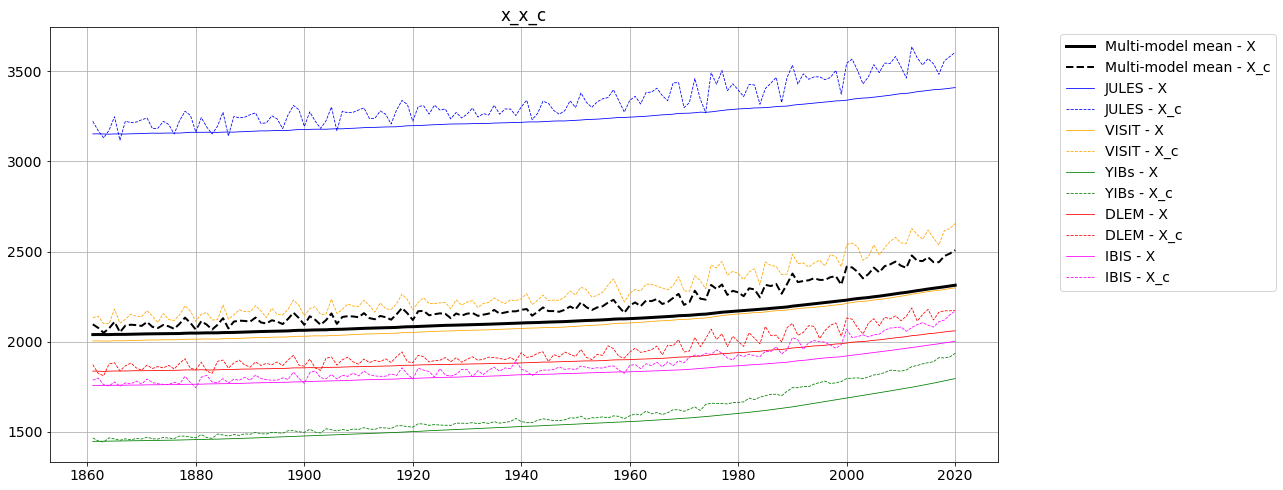

In [17]:
x_x_c,sigma_x_x_c=gh.plot_traceable_component(
    all_comp_dict,
    "x_x_c",
    model_cols,
    #delta=True,
)
x_x_c,sigma_x_x_c=gh.plot_traceable_component(
    all_comp_dict_out,
    "x_x_c",
    model_cols,
    #delta=True,
)

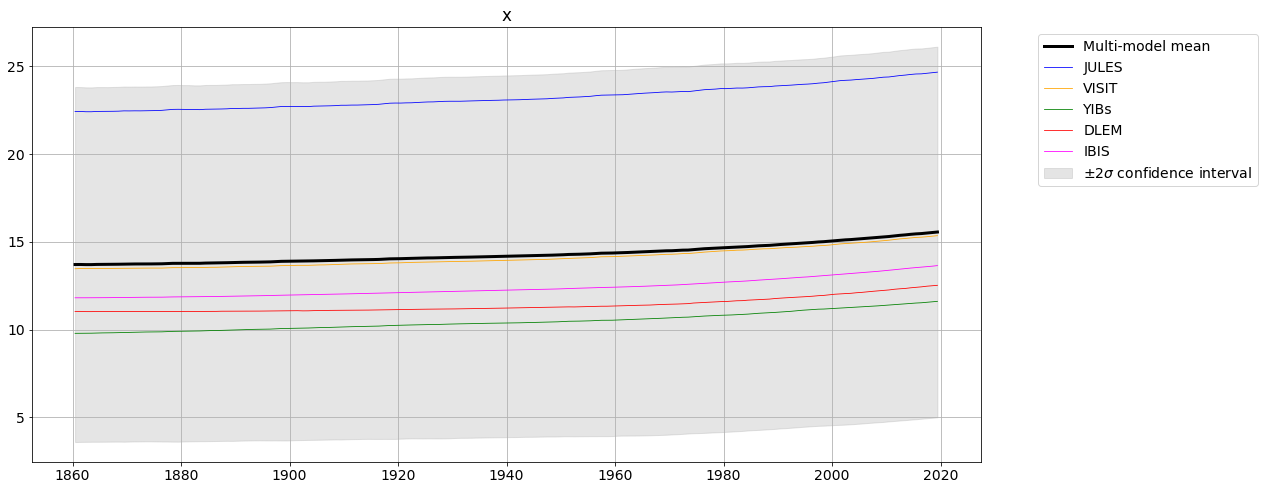

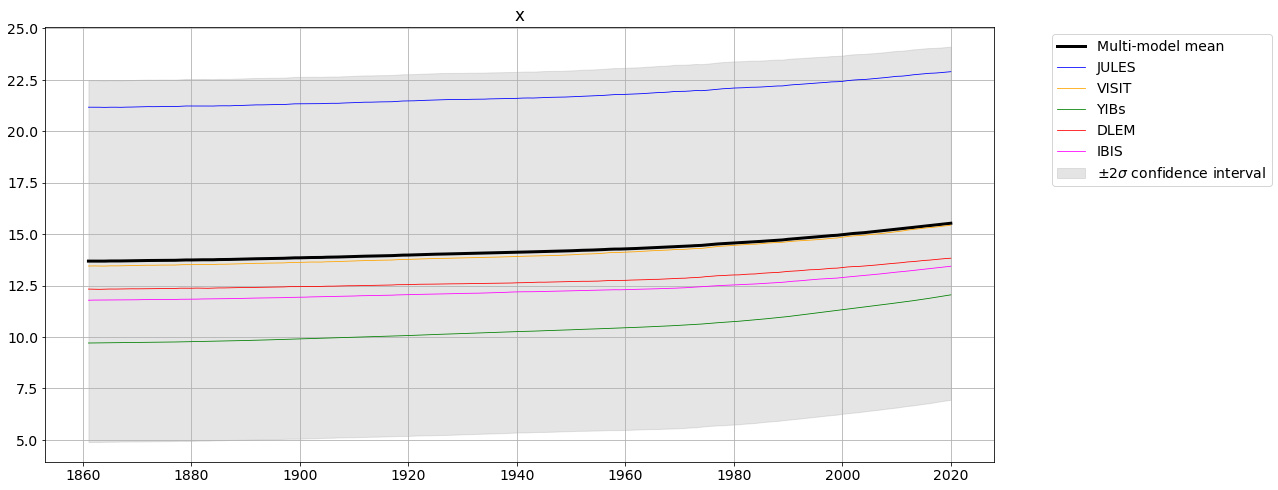

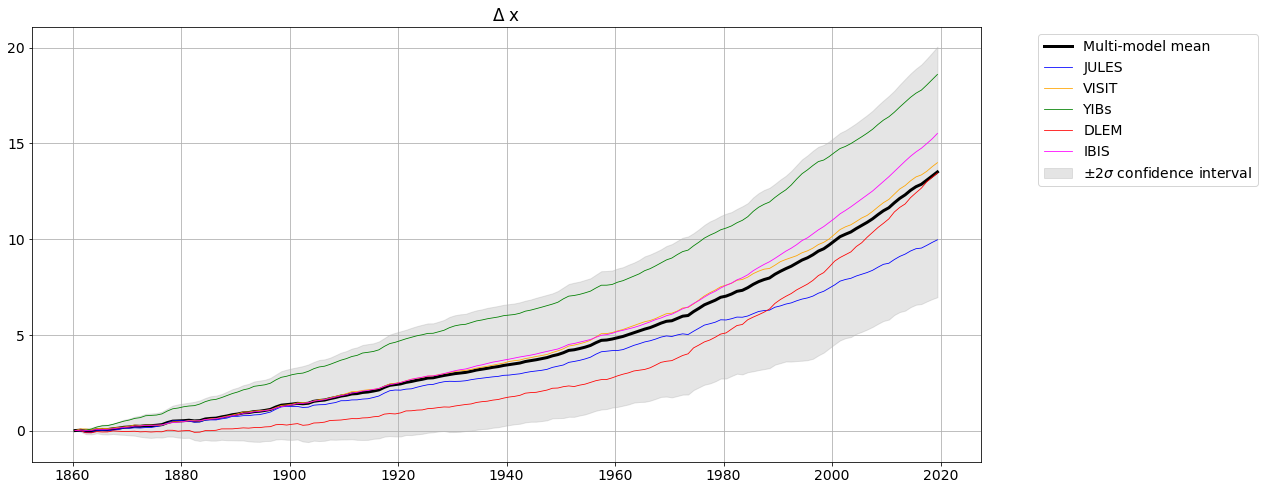

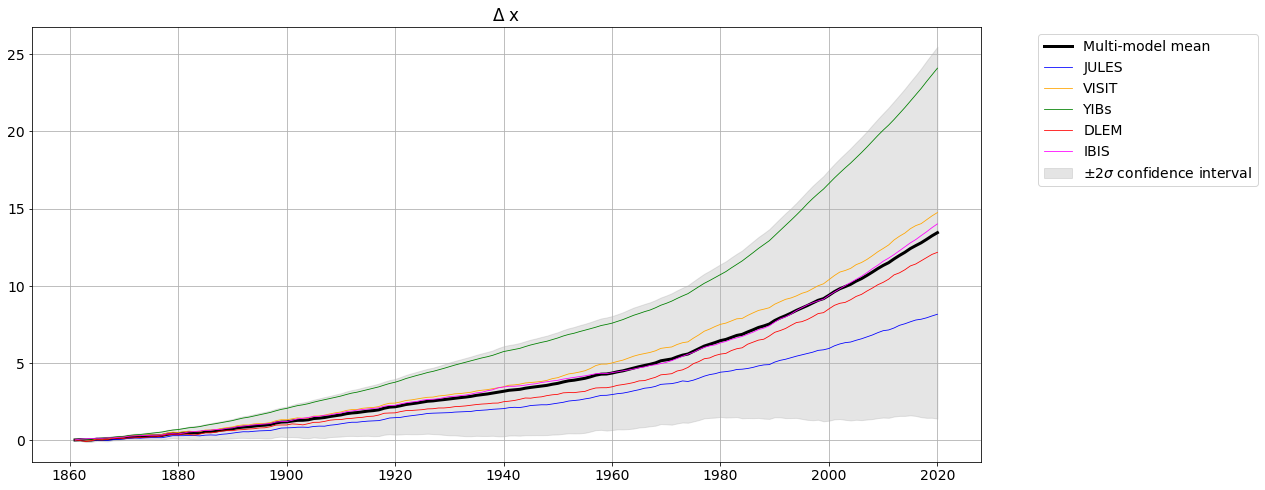

In [19]:
x1,sigma_x1=gh.plot_traceable_component(
    all_comp_dict,
    "x",
    model_cols,
    #delta=True,
)
x1,sigma_x1=gh.plot_traceable_component(
    all_comp_dict_out,
    "x",
    model_cols,
    #delta=True,
)
x2,sigma_x2=gh.plot_traceable_component(
    all_comp_dict,
    "x",
    model_cols,
    delta=True,
)
x2,sigma_x2=gh.plot_traceable_component(
    all_comp_dict_out,
    "x",
    model_cols,
    delta=True,
)

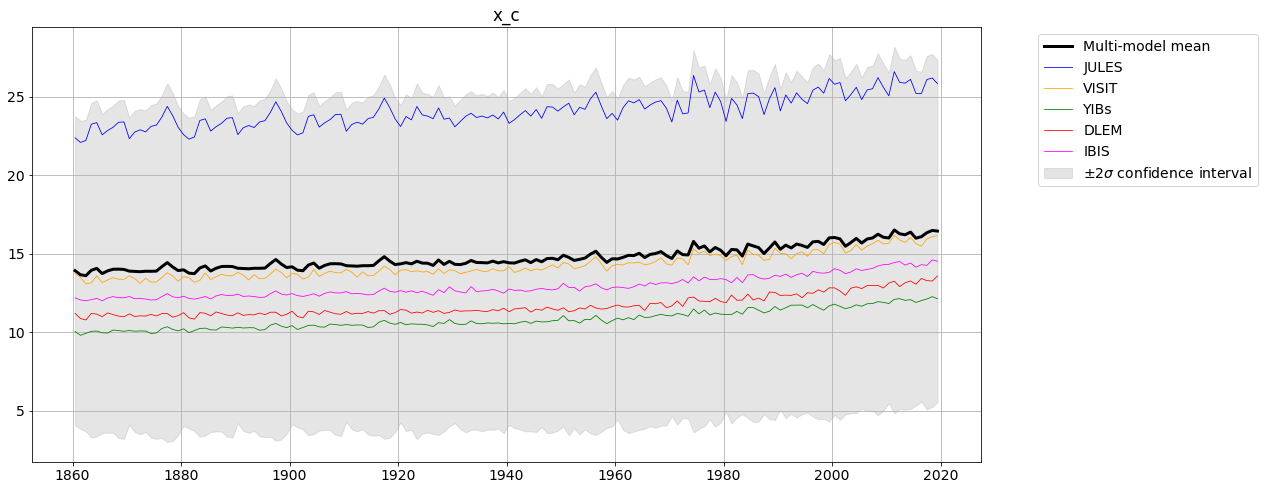

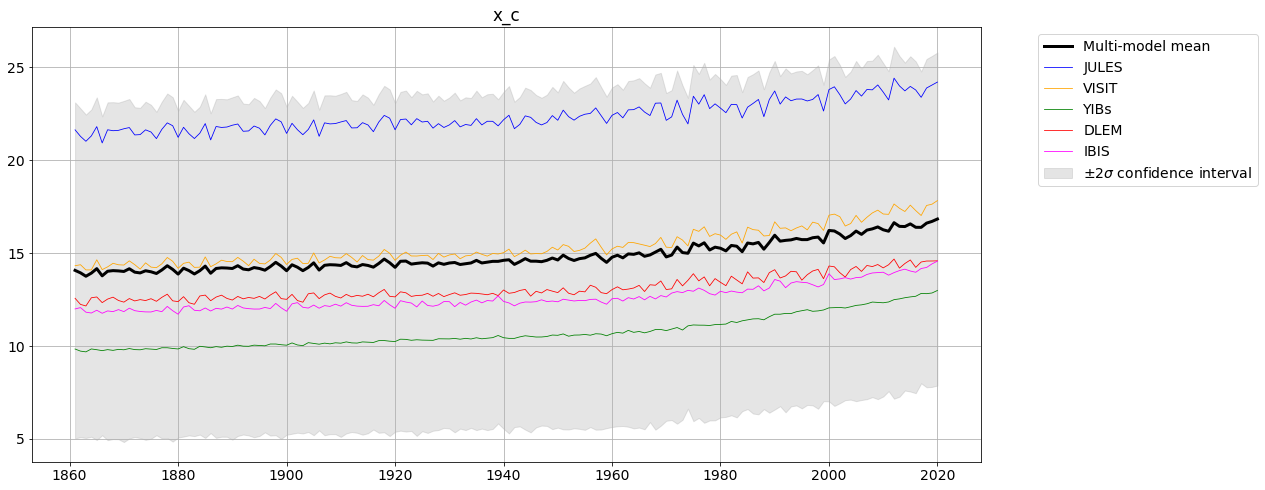

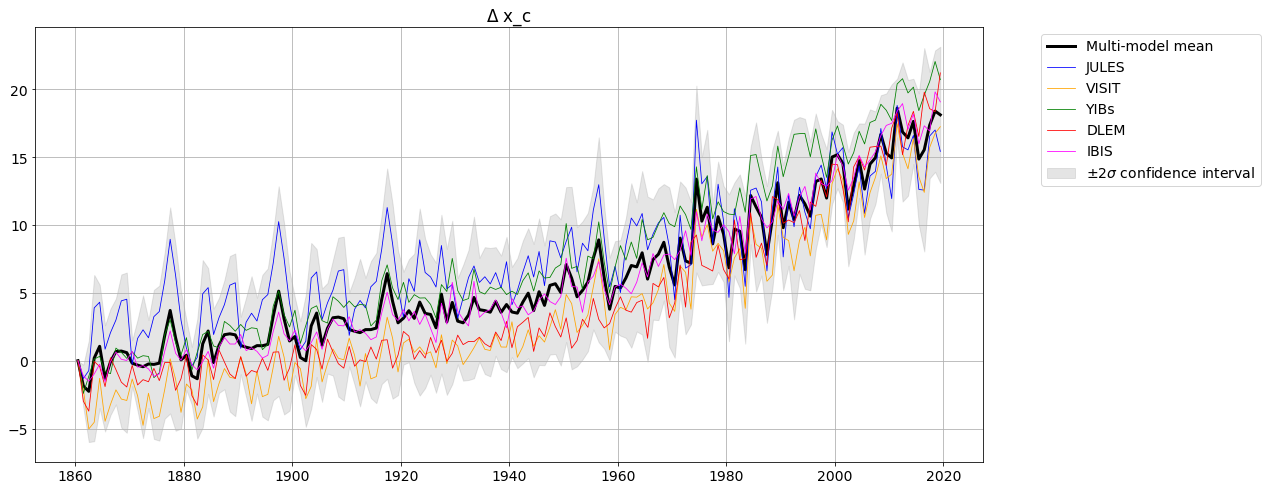

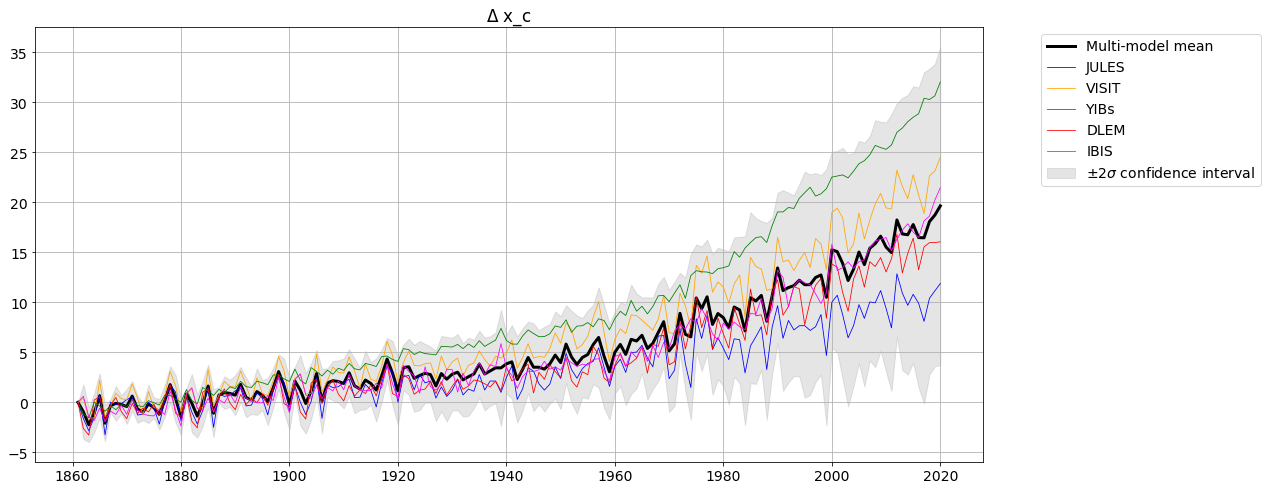

In [20]:
x_c1,sigma_x_c1=gh.plot_traceable_component(
    all_comp_dict,
    "x_c",
    model_cols,
    #delta=True,
)
x_c1,sigma_x_c1=gh.plot_traceable_component(
    all_comp_dict_out,
    "x_c",
    model_cols,
    #delta=True,
)
x_c2,sigma_x_c2=gh.plot_traceable_component(
    all_comp_dict,
    "x_c",
    model_cols,
    delta=True,
)
x_c2,sigma_x_c2=gh.plot_traceable_component(
    all_comp_dict_out,
    "x_c",
    model_cols,
    delta=True,
)

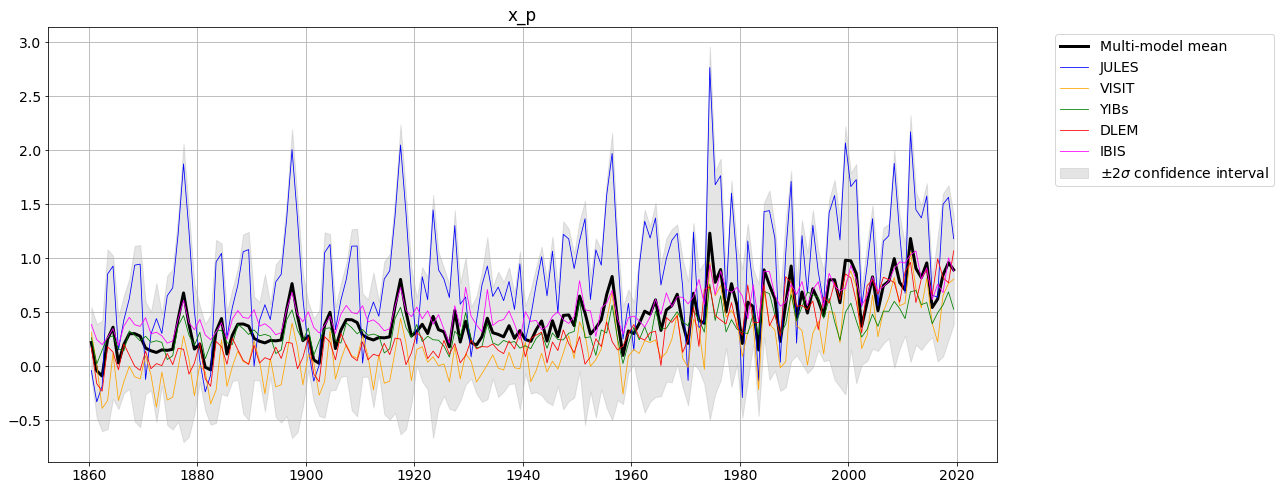

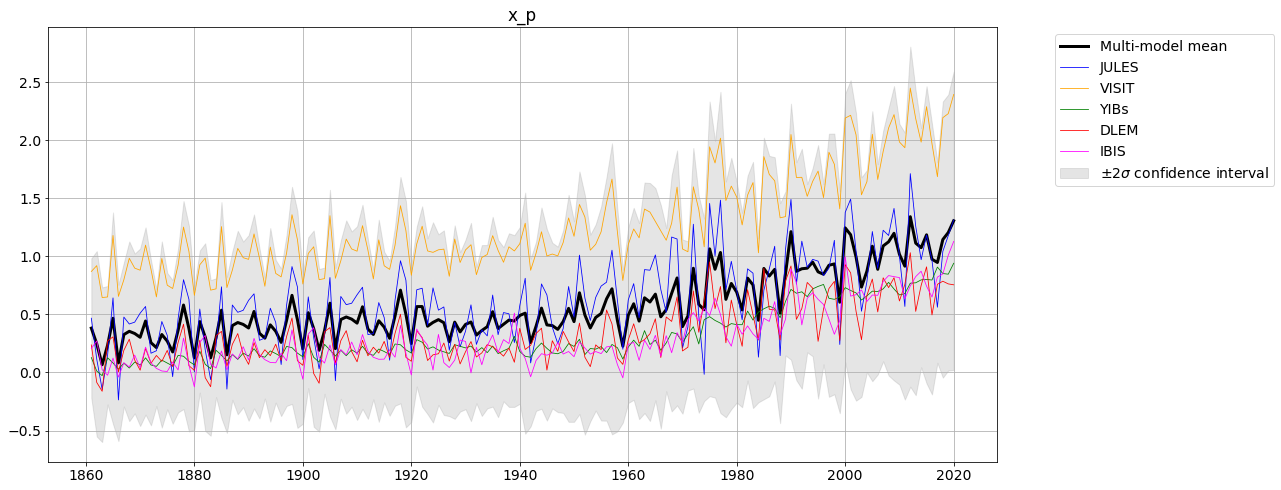

In [21]:
x_p1,sigma_x_p1=gh.plot_traceable_component(
    all_comp_dict,
    "x_p",
    model_cols,
    #delta=True,
)
x_p1,sigma_x_p1=gh.plot_traceable_component(
    all_comp_dict_out,
    "x_p",
    model_cols,
    #delta=True,
)

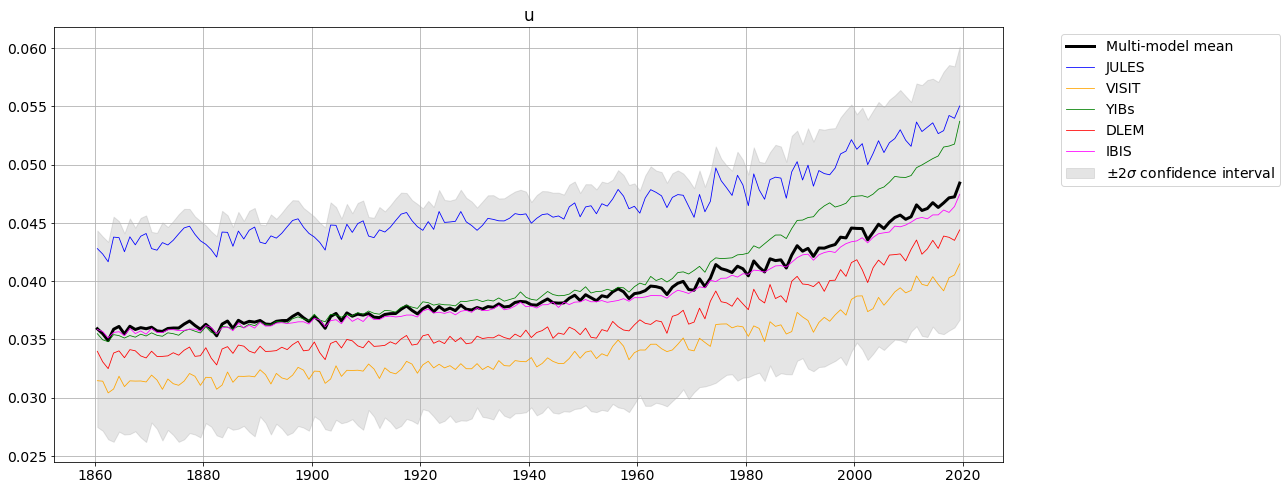

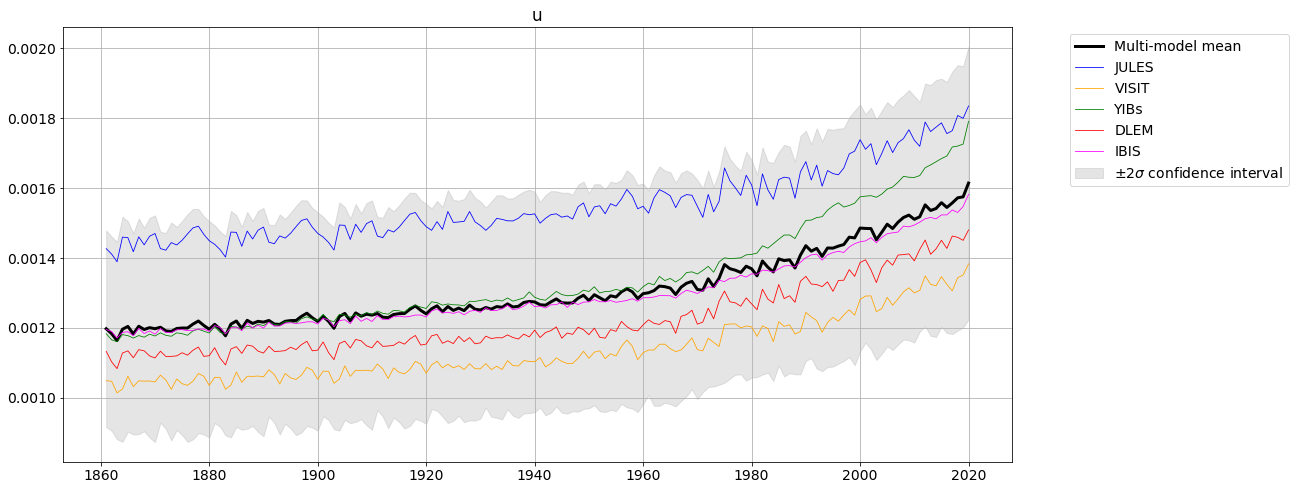

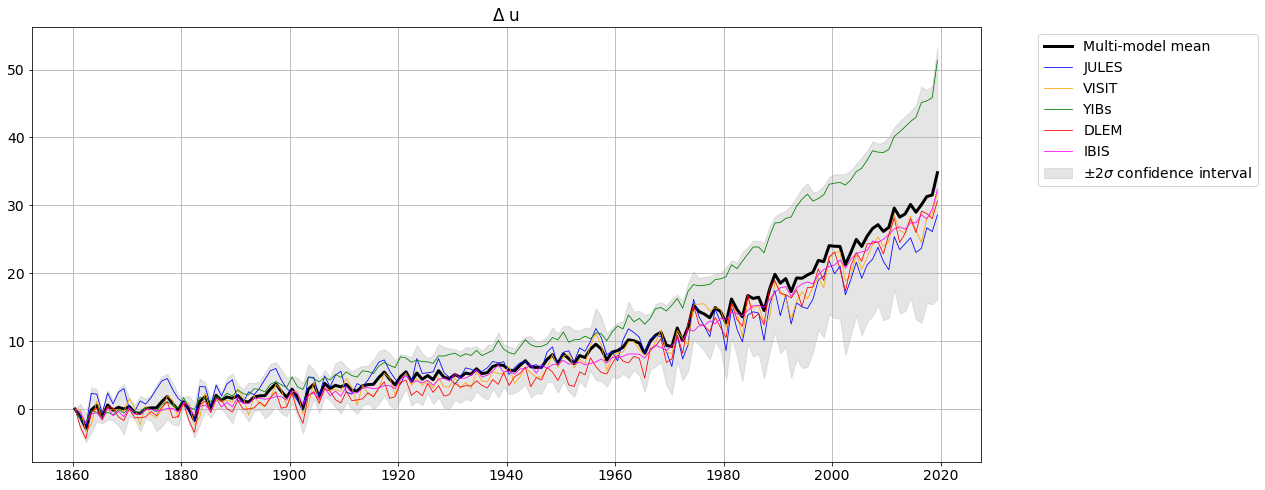

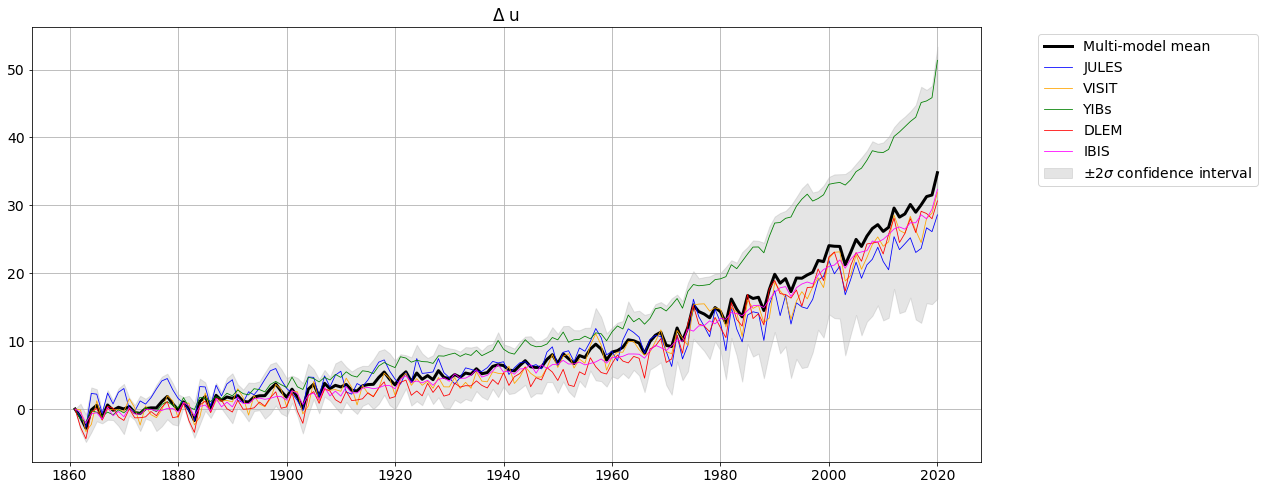

In [22]:
u1, sigma_u1=gh.plot_traceable_component(
    all_comp_dict,
    "u",
    model_cols,
    #delta=True,
)
u1, sigma_u1=gh.plot_traceable_component(
    all_comp_dict_out,
    "u",
    model_cols,
    #delta=True,
)
u2, sigma_u2=gh.plot_traceable_component(
    all_comp_dict,
    "u",
    model_cols,
    delta=True,
)
u2, sigma_u2=gh.plot_traceable_component(
    all_comp_dict_out,
    "u",
    model_cols,
    delta=True,
)

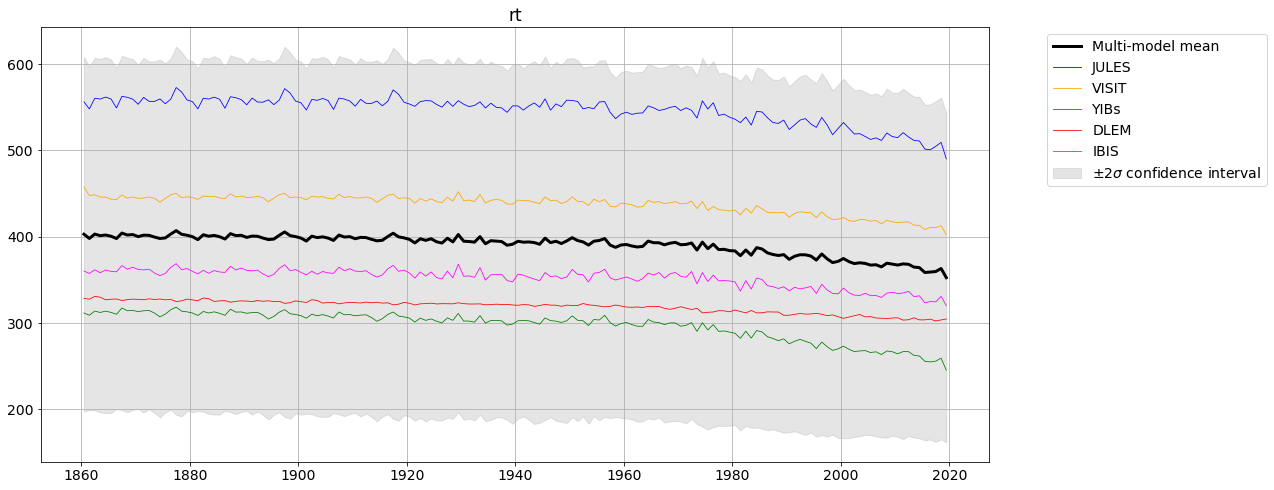

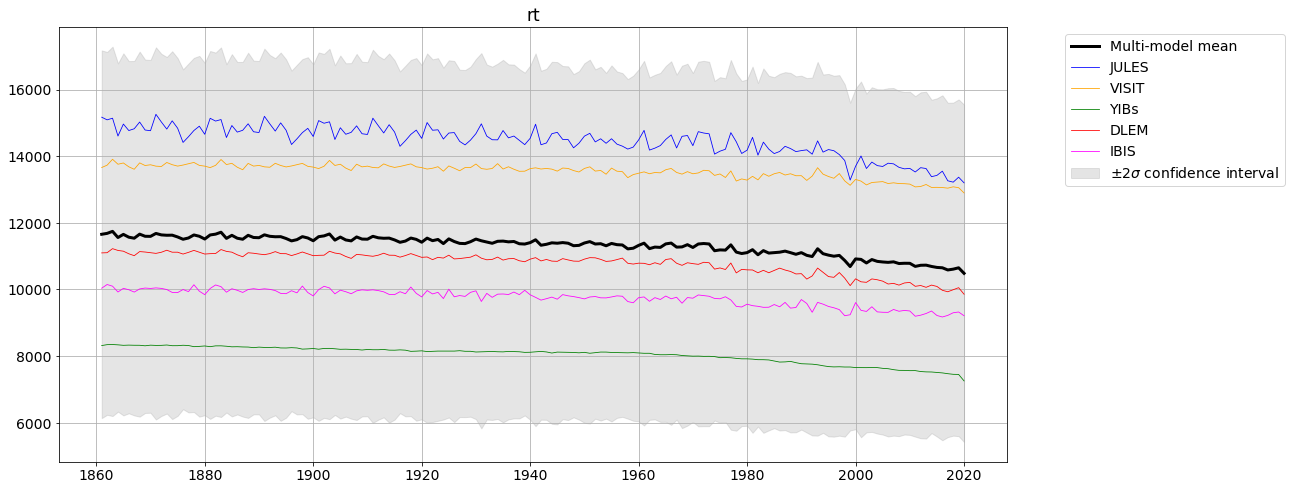

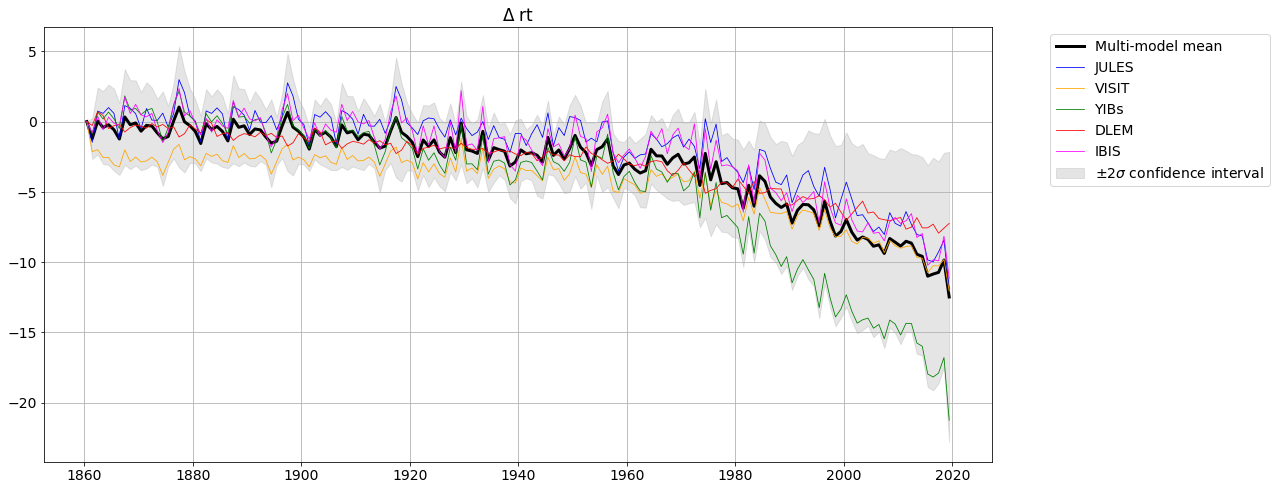

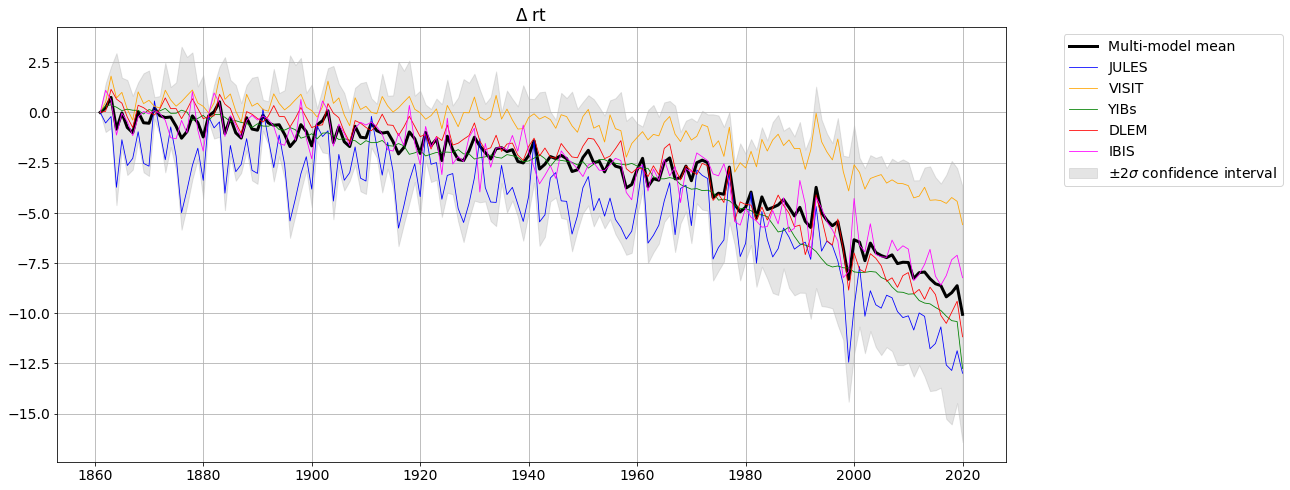

In [23]:
rt1,sigma_rt1=gh.plot_traceable_component(
    all_comp_dict,
    "rt",
    model_cols,
    #delta=True,
)
rt1,sigma_rt1=gh.plot_traceable_component(
    all_comp_dict_out,
    "rt",
    model_cols,
    #delta=True,
)
rt2,sigma_rt2=gh.plot_traceable_component(
    all_comp_dict,
    "rt",
    model_cols,
    delta=True,
)
rt2,sigma_rt2=gh.plot_traceable_component(
    all_comp_dict_out,
    "rt",
    model_cols,
    delta=True,
)

In [24]:
plt.rcParams.update({'font.size': 12})

Attribution of summed deviations from the mean for all models to the differences in traceable components


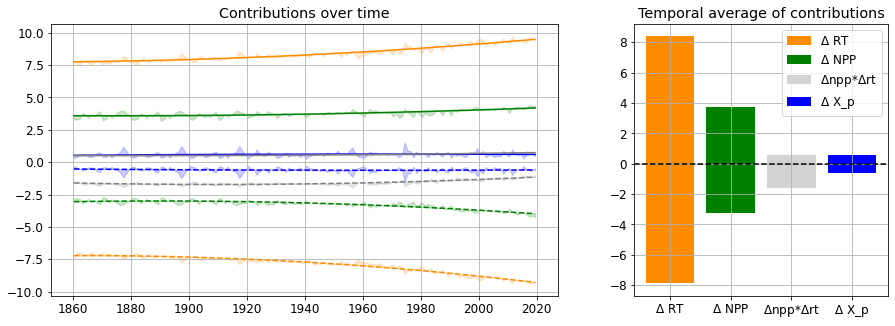

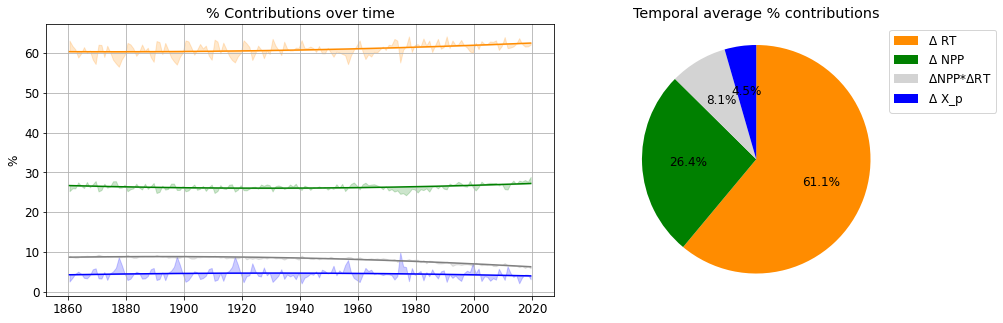

Attribution of summed deviations from the mean for all models to the differences in traceable components


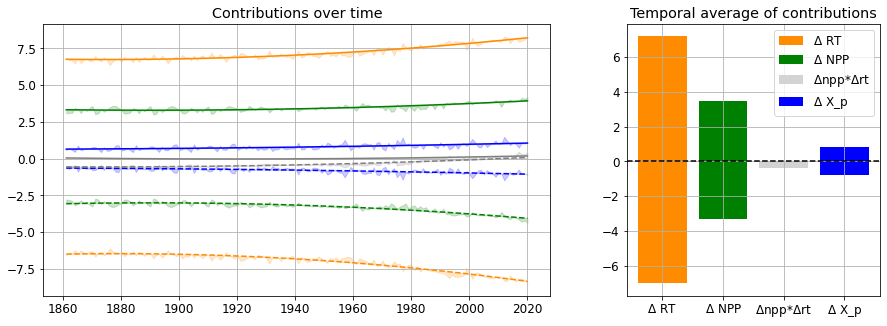

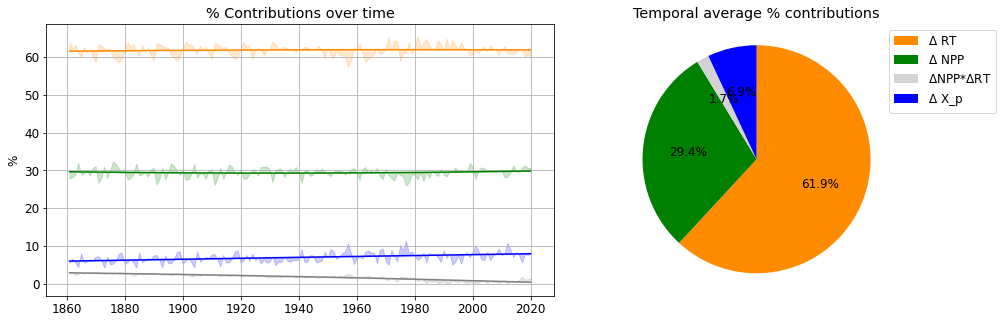

In [25]:
gh.plot_attribution_sum (
    all_comp_dict=all_comp_dict,
    percent=True,
    part=1,
)
gh.plot_attribution_sum (
    all_comp_dict=all_comp_dict_out,
    percent=True,
    part=1,
)